# TD Simulation and Monte Carlo Methods

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Exercice 1 : RANDU

##### Visualisation 2D de RANDU

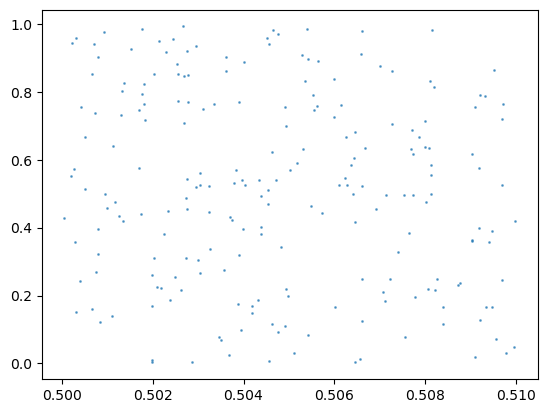

In [13]:
def RANDU(N):
    seed = 10**2
    m = 2**31
    a = 65539
    X = np.array([seed])
    U = np.array([seed/m])
    for i in range(N):
        x = (a*X[i])%m
        X = np.append(X,x)
        U = np.append(U,x/m)
    return U

N = 2 * 10**4
U = RANDU(N)
indices = np.where((U[:-1] >= 0.5) & (U[:-1] <= 0.51))[0]

plt.scatter(U[indices], U[indices + 1], s = 1, alpha = 0.6)
plt.show()

##### Visualisation 3D de RANDU

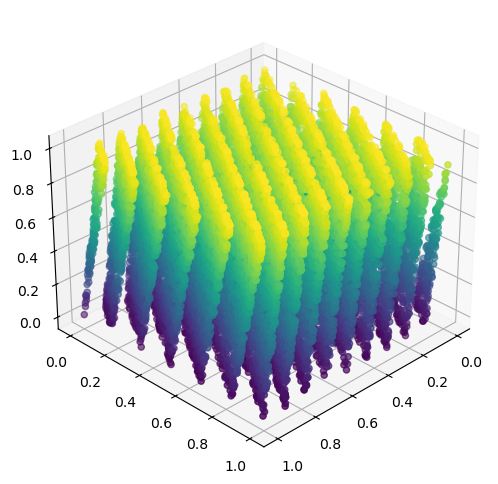

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(U[:len(U)-2], U[1:len(U)-1], U[2::], c=U[2:], cmap='viridis', marker='o')

# Orientation de la caméra
ax.view_init(elev=30, azim=45)

plt.show()

## Exercice 2 : Laplace and Rejection

In [21]:
N = 10**5

#### Générer une loi de Laplace par Méthode d'Inversion

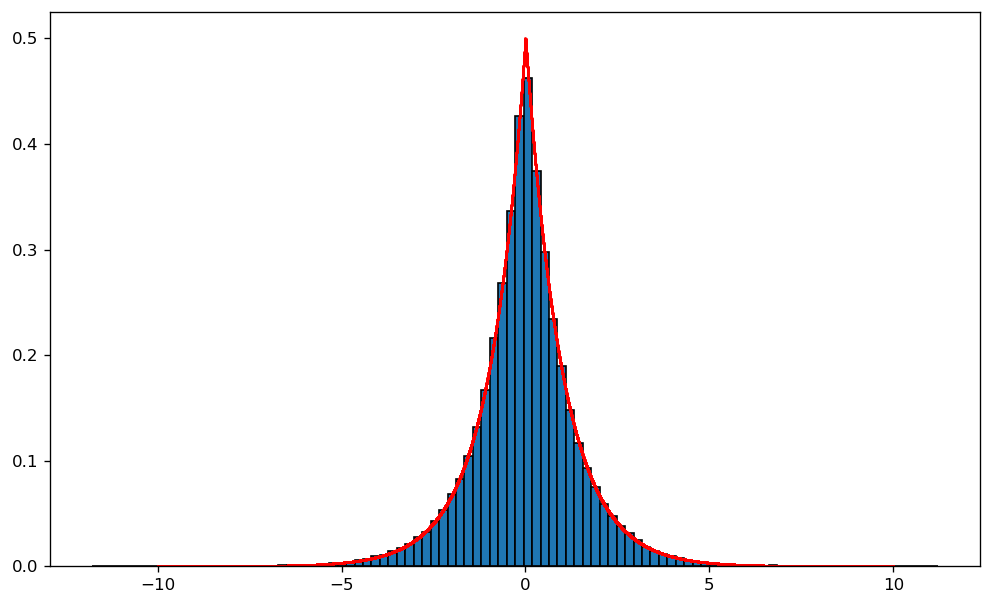

In [31]:
# Générer la loi Uniforme
U = np.random.uniform(0,1,N)

# Implémentation de F-1

def Finv (x):
    if x < 0.5:
        return np.log(2*x)
    elif x >= 0.5:
        return - np.log(2*(1-x))

# Génération de la loi de Laplace 
Finv_vect = np.vectorize(Finv)
L = Finv_vect(U)

# Laplace Originale

def Laplace_density(x):
    return 0.5 * np.exp(-np.abs(x))

intervalle = np.linspace(-10,10,N)
Laplace_Originale = Laplace_density(intervalle)

# Plots
plt.figure(figsize=(10, 6), dpi=120)
plt.hist(L, bins = 100, density = True, edgecolor = "black")
plt.scatter(intervalle, Laplace_Originale, color = 'red', s = 1, alpha = 0.5, marker = ".")
plt.show()


#### Générer une loi Normale centrée et réduite par la Méthode de Rejet

0.7610523832355381


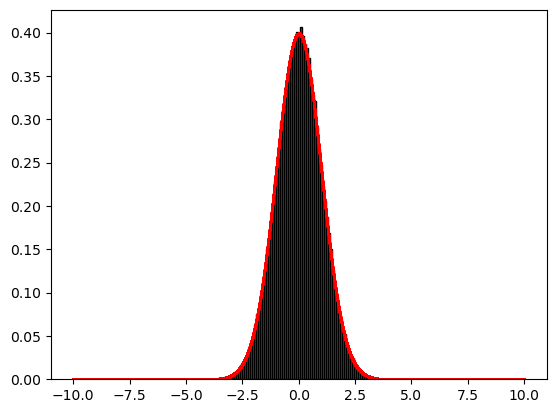

In [39]:
# Constante de rejet
m = 1.315

# Densité de N(0;1)
def Normal_density(x):
    return 1/np.sqrt(2*np.pi) * np.exp(- x**2 / 2)

# Recherche de X = Y_N par comparaison au rapport d'acceptation
def rejet(N):
    cpt = 0
    samples = np.array([])
    while len(samples) < N:
        cpt += 1
        u = np.random.uniform(0,1)                           # On génére des lois Uniforme et Laplace de taille 1, on prend un point
        y = np.random.laplace(loc = 0, scale = 1)
        if u <= Normal_density(y)/(m * Laplace_density(y)):
            samples = np.append(samples,y)
    return samples, cpt

# Taux d'acceptance :
print(N/rejet(N)[1])

# Rq : la sortie ne suit pas une Laplace, car on selectionne les valeurs pour lesquelles f(x) est grand et p(x) petit

plt.hist(rejet(N)[0], bins = 100, density = True, edgecolor = 'black')
plt.scatter(intervalle, Normal_density(intervalle), s = 1, alpha = 0.6, marker = ".", color = 'red')
plt.show()

## Exercice 3 : Improved Box-Muller

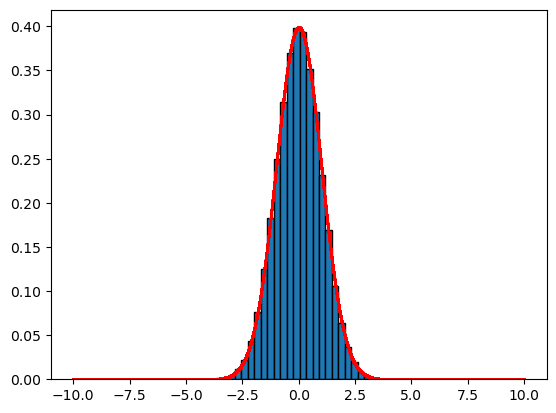

In [57]:
N = 10**5

# Box-Muller Classique
def polaire(x,y):
    return np.sqrt(-2*np.log(x))*np.cos(2*np.pi*y), np.sqrt(-2*np.log(x))*np.sin(2*np.pi*y)

def Box_Muller(N):
    U = np.random.uniform(0,1,N)
    V = np.random.uniform(0,1,N)
    X = np.array([])
    Y = np.array([])
    X, Y = polaire(U,V)
    return X, Y

plt.hist(Box_Muller(N)[0], bins = 30, density = True, edgecolor = 'black')
plt.scatter(intervalle, Normal_density(intervalle), color = 'red', s = 1, alpha = 0.6)
plt.show()



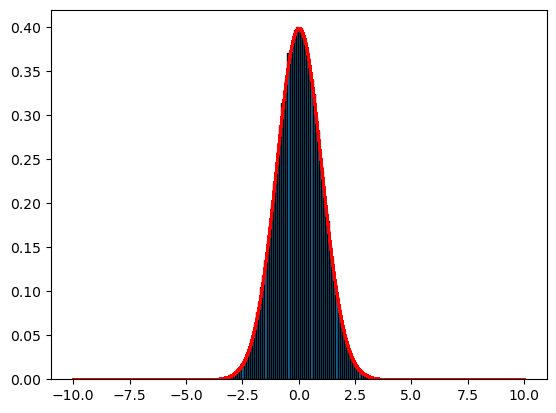

In [56]:
# Box-Muller Amélioré
def BM_Improved(N):
    X = np.array([])
    Y = np.array([])
    while len(X) < N:
        u1 = np.random.uniform(-1,1)
        u2 = np.random.uniform(-1,1)
        s = u1 ** 2 + u2 ** 2
        if s <= 1:
            X = np.append(X,u1 * np.sqrt(-2*np.log(s)/s))
            Y = np.append(X,u2 * np.sqrt(-2*np.log(s)/s))
    return X, Y

plt.hist(BM_Improved(N)[0], bins = 100, density = True, edgecolor = "black")
plt.scatter(intervalle, Normal_density(intervalle), color = 'red', s = 1, alpha = 0.6)
plt.show()
